In [29]:
%matplotlib inline

In [30]:
# Data
import pandas as pd
import numpy as np

In [31]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

In [32]:
# Machine learning
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,\
	ExtraTreesClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

In [33]:
import platform
if platform.system() == 'Windows':
    import os
    os.chdir('C:/Users/Lordzsolt/_PythonStuff/Kaggle/Titanic/src')

In [34]:
trainDF = pd.read_csv("../output/train.csv")
testDF = pd.read_csv("../output/test.csv")

testID = testDF['PassengerId']
trainDF.drop(labels=['PassengerId'], axis=1, inplace=True)
testDF.drop(labels=['PassengerId'], axis=1, inplace=True)

# Model

In [35]:
trainDF.head()

,Age,Fare,Parch,Sex,SibSp,Survived,FSize,Cabin_A,Cabin_B,Cabin_C,...,Ticket_SOTONO2,Ticket_SOTONOQ,Ticket_SP,Ticket_STONO,Ticket_STONO2,Ticket_STONOQ,Ticket_SWPP,Ticket_WC,Ticket_WEP,Ticket_X
0,-0.536933,-0.903546,-0.458969,0,0.625474,0.0,0.131479,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.655787,1.409076,-0.458969,1,0.625474,1.0,0.131479,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,-0.238753,-0.813475,-0.458969,1,-0.522532,1.0,-0.592476,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.432152,1.111117,-0.458969,1,0.625474,1.0,0.131479,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0.432152,-0.797641,-0.458969,0,-0.522532,0.0,-0.592476,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
trainDF['Survived'] = trainDF['Survived'].astype(int)
Y_train = trainDF['Survived']
X_train = trainDF.drop(labels=['Survived'], axis=1)

In [37]:
kfold = StratifiedKFold(n_splits=10)

random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state), random_state=random_state, learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y=Y_train, scoring='accuracy',  cv=kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({'CrossValMeans':cv_means,'CrossValerrors':
	cv_std,'Algorithm':['SVC', 'DecisionTree', 'AdaBoost', 'RandomForest', 'ExtraTrees',
                        'GradientBoosting', 'MultipleLayerPerceptron', 'KNeighboors', 'LogisticRegression']})

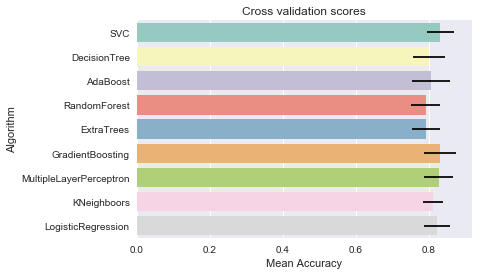

In [38]:
g = sns.barplot('CrossValMeans', 'Algorithm', data=cv_res, palette='Set3', orient='h', **{'xerr':cv_std})
g.set_xlabel('Mean Accuracy')
g = g.set_title('Cross validation scores')

In [39]:
# ExtraTrees 
ExtC = ExtraTreesClassifier()

## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC, param_grid=ex_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)
gsExtC.fit(X_train, Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.9s


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.7s


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   37.2s


[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   44.6s finished


0.83200908059023837

In [40]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()

## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC, param_grid=rf_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)
gsRFC.fit(X_train, Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    7.7s


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   18.1s


[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:   39.3s


[Parallel(n_jobs=4)]: Done 540 out of 540 | elapsed:   47.7s finished


0.83427922814982969

In [41]:
# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC, param_grid=gb_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose = 1)
gsGBC.fit(X_train, Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.4s


[Parallel(n_jobs=4)]: Done 308 tasks      | elapsed:   13.7s


[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   25.0s finished


0.83427922814982969

In [42]:
### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC, param_grid=svc_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)

gsSVMC.fit(X_train, Y_train)

SVMC_best = gsSVMC.best_estimator_

# Best score
gsSVMC.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    6.3s


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   17.9s


[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:   29.8s finished


0.83087400681044266

In [43]:
### MLP Tuning
MLP = MLPClassifier()
gsMLP = GridSearchCV
param_grid = {
    'alpha': [ 0.3, 1, 2, 3, 10],
    'hidden_layer_sizes': [50, 100, (50, 50), (80, 80)]
}

gsMLP = GridSearchCV(MLP, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=4, verbose=1)
gsMLP.fit(X_train, Y_train)
MLP_best = gsMLP.best_estimator_

gsMLP.best_score_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   13.7s


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   42.0s


[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:   43.7s finished


0.83200908059023837

In [44]:
MLP_best

MLPClassifier(activation='relu', alpha=2, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=100, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

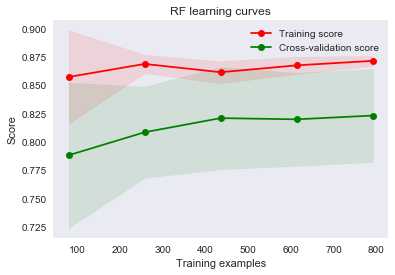

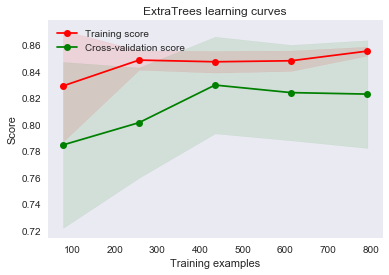

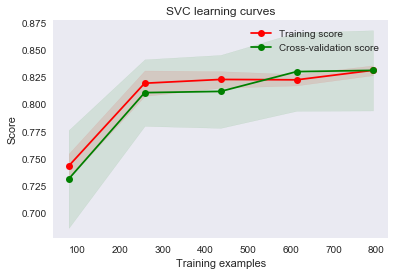

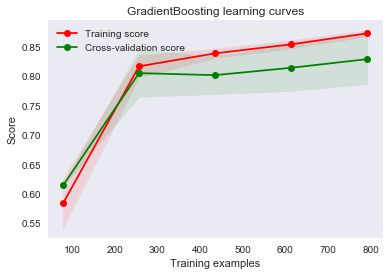

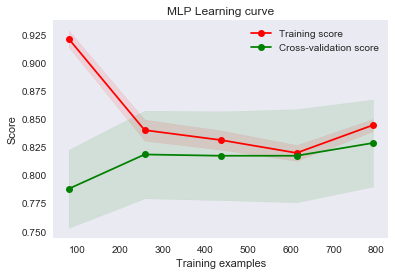

In [45]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_, "RF learning curves", X_train, Y_train, cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_, "ExtraTrees learning curves", X_train, Y_train, cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_, "SVC learning curves", X_train, Y_train, cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_, "GradientBoosting learning curves", X_train, Y_train, cv=kfold)
g = plot_learning_curve(gsMLP.best_estimator_, "MLP Learning curve", X_train, Y_train, cv=kfold)

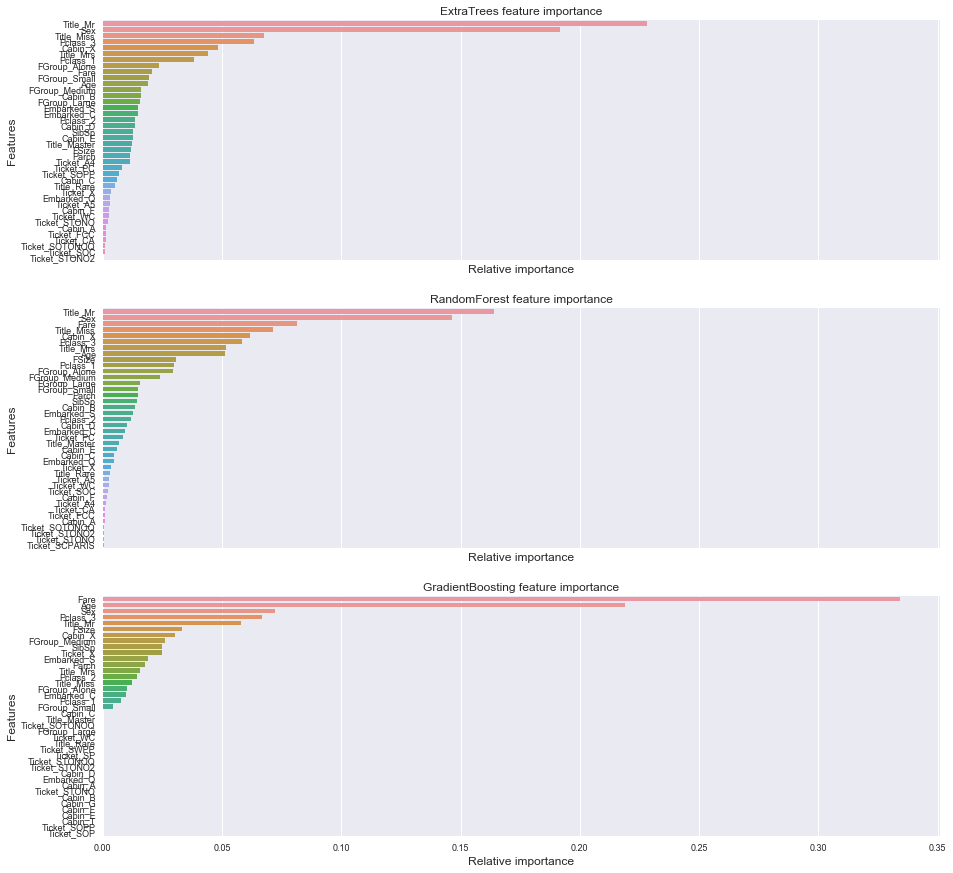

In [46]:
nrows = 3
fig, axes = plt.subplots(nrows=nrows, ncols=1, sharex="all", figsize=(15, 15))

names_classifiers = [("ExtraTrees", ExtC_best), ("RandomForest", RFC_best), ("GradientBoosting", GBC_best)]

nclassifier = 0
for row in range(nrows):
    name = names_classifiers[nclassifier][0]
    classifier = names_classifiers[nclassifier][1]
    indices = np.argsort(classifier.feature_importances_)[::-1][:40]
    g = sns.barplot(y=X_train.columns[indices][:40], x=classifier.feature_importances_[indices][:40], orient='h', ax=axes[row])
    g.set_xlabel("Relative importance", fontsize=12)
    g.set_ylabel("Features", fontsize=12)
    g.tick_params(labelsize=9)
    g.set_title(name + " feature importance")
    nclassifier += 1

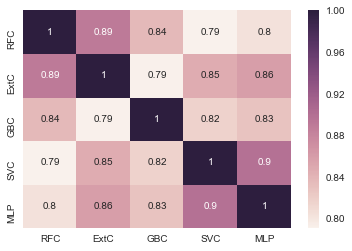

In [47]:
test_Survived_RFC = pd.Series(RFC_best.predict(testDF), name="RFC")
test_Survived_ExtC = pd.Series(ExtC_best.predict(testDF), name="ExtC")
test_Survived_SVMC = pd.Series(SVMC_best.predict(testDF), name="SVC")
test_Survived_GBC = pd.Series(GBC_best.predict(testDF), name="GBC")
test_Survived_MLP = pd.Series(MLP_best.predict(testDF), name="MLP")


# Concatenate all classifier results
ensemble_results = pd.concat([test_Survived_RFC, test_Survived_ExtC, 
                              test_Survived_GBC, test_Survived_SVMC, test_Survived_MLP], axis=1)


g = sns.heatmap(ensemble_results.corr(), annot=True)

In [48]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
                                       ('svc', SVMC_best),
                                       ('gbc', GBC_best), ('mlp', MLP_best)], voting='soft', n_jobs=4)

votingC = votingC.fit(X_train, Y_train)

In [49]:
test_Survived = pd.Series(votingC.predict(testDF), name="Survived")

results = pd.concat([testID, test_Survived], axis=1)
results.to_csv("../output/submission_ensemble.csv", index=False)